----

# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

## Inicialización

A continuación se cargan las librerías, en particular, pandas para hacer en análisis de datos y matplotlib para trabajar con gráficos.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 

### Carga de Datos

Se abre el archivo .csv para su lectura en pandas.

In [3]:
df = pd.read_csv('/datasets/vehicles_us.csv')

### Exploración de datos iniciales

El dataset contiene los siguientes campos expresados como columnas:

- `price` - precio
- `model_year`- año del modelo
- `model`- modelo
- `condition`- condición
- `cylinders`- cilindros
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission` - transmisión
- `paint_color` - color de la pintura
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina



A continuación se observa una vista resumida del dataframe, que cuenta con 13 columnas, 51525 filas y datos ausentes.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
df.shape

(51525, 13)

Para observar con más claridad el dataframe, se imprime una muestra de este, que incluye las 10 primeras filas.

In [6]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


El dataframe está compuesto por 13 columnas y 51525 filas. Dichas filas presentan valores ausentes para algunas columnas, además de datos cuyo tipo no está expresado correctamente, por lo que se deberán tratar los valores ausentes y corregir los tipos de datos. En particular, las columnas model_year y cylinders representan respectivamente el año del auto, y la cantidad de cilindros, es decir, números enteros, pero en el dataframe están expresados como decimales. Además, la columna is_4w es una variable dummy al representar la ausencia o presencia de un atributo, en este caso, si el vehículo tiene tracción a cuatro ruedas. Los valores 1 que denotan la presencia del atributo están bien expresados en el dataframe pero los valores 0 aparecen como datos NaN. Además, a primera vista, se observan datos ausentes para las columnas, model_year, cylinders, odometer, paint_color e is_4wd. 

## Tratamiento de los valores ausentes 

A continuación se definirá la cantidad y el porcentaje de datos ausentes para cada columna, para ver qué tan grande puede ser su impacto en el dataframe y cómo tratarlos.

In [7]:
df[['model_year', 'cylinders', 'odometer','paint_color', 'is_4wd']].isna().sum()

model_year      3619
cylinders       5260
odometer        7892
paint_color     9267
is_4wd         25953
dtype: int64

In [8]:
missing_data = df.isnull().sum()
total_rows = df.shape[0]
percent_missing = (missing_data/ total_rows) * 100
print(percent_missing)

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64


### Model_year

El año del modelo representa menos del 10% de los datos, por lo que se eliminarán dichas filas con el método .dropna.

In [9]:
df = df.dropna(subset=['model_year']).reset_index(drop=True)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
2,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
3,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
4,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15


### Is_4wd

Para convertir esta variable en una variable booleana solo hace falta reemplezar los datos NaN por un cero, para esto se usará el método .fillna.

In [10]:
df['is_4wd'].fillna(0, inplace = True)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
2,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
3,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
4,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15


### Paint_color

Es difícil obtener la pintura del color a partir de otras variables, por lo que se agregará el valor "otro" para esta variable, usando el método .fillna para reemplazar los datos NaN por este nuevo valor.

In [11]:
df['paint_color'] = df['paint_color'].fillna(value='other')
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,other,1.0,2018-06-23,19
1,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
2,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,other,0.0,2019-03-22,9
3,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
4,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15


### Cylinders

Para reemplazar el valor de los cilindros, se calculará mediante una función la mediana de los cilindros para cada modelo de vehículo. Posteriormente, mediante un bucle for, los valores NaN serán remplazados con la mediana de su respectivo modelo a través del método .fillna.

In [11]:
def median_cylinders(model):
    median = df.loc[df['model'] == model, 'cylinders'].median()
    return median

for f in df['model'].unique():
    fill_value = median_cylinders(f)
    df.loc[df['model'] == f, 'cylinders'] = df.loc[df['model'] == f, 'cylinders'].fillna(fill_value)

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,other,1.0,2018-06-23,19
1,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
2,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,other,0.0,2019-03-22,9
3,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
4,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15


### Odometer

Para reemplazar el valor del odómetro, nuevamente se definirá mediante una función la mediana del odómetro para cada modelo de vehículo, excepto para un modelo de Mercedez Benz que no tiene información sobre su millaje. Posteriormente, mediante un bucle for, los valores NaN serán remplazados con la mediana de su respectivo modelo a través del método .fillna.

In [12]:
def median_odometer(model):
    median = df.loc[df['model'] == model, 'odometer'].median()
    return median

for f in df['model'].unique():
    fill_value = median_odometer(f)
    df.loc[df['model'] == f, 'odometer'] = df.loc[df['model'] == f, 'odometer'].fillna(fill_value)
df.head()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,other,1.0,2018-06-23,19
1,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
2,1500,2003.0,ford f-150,fair,8.0,gas,121928.0,automatic,pickup,other,0.0,2019-03-22,9
3,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
4,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15


Finalmente, describiremos estadísticamente el dataframe para ver si hay algún otro problema.

In [13]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,47906.000000,47906.000000,47906.000000,47872.000000,47906.000000,47906.000000
mean,12160.465203,2009.750470,6.121843,115197.876619,0.496055,39.564835
std,10082.453773,6.282065,1.656820,60751.314679,0.499990,28.201967
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.000000
25%,5000.000000,2006.000000,4.000000,76834.000000,0.000000,19.000000
50%,9000.000000,2011.000000,6.000000,115300.000000,0.000000,33.000000
75%,16900.000000,2014.000000,8.000000,148087.000000,1.000000,53.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.000000


## Corrección de los tipos de datos

Para saber qué tipos de datos tenemos, usamos el método .dtypes. 

In [14]:
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

Cambiaremos los números de las columnas, model_year, cylinders, odometer e is_4wd a números enteros, ya que actualmente aparecen como números de coma flotante.

In [13]:
df = df.dropna()

In [14]:
df['model_year'] = df['model_year'].astype('int64')
df['cylinders'] = df['cylinders'].astype('int64')
df['odometer'] = df['odometer'].astype('int64')
df['is_4wd'] = df['is_4wd'].astype('int64')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42978 entries, 0 to 47905
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         42978 non-null  int64 
 1   model_year    42978 non-null  int64 
 2   model         42978 non-null  object
 3   condition     42978 non-null  object
 4   cylinders     42978 non-null  int64 
 5   fuel          42978 non-null  object
 6   odometer      42978 non-null  int64 
 7   transmission  42978 non-null  object
 8   type          42978 non-null  object
 9   paint_color   42978 non-null  object
 10  is_4wd        42978 non-null  int64 
 11  date_posted   42978 non-null  object
 12  days_listed   42978 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 4.6+ MB


## Enriquecimiento datos

A continuación se harán ajustes para facilitar el análisis de datos, en particular, se convertirá la fecha al formato de pandas .to_datetime, se agregarán los años del vehículo a la fecha y el millaje promedio del vehículo por año, junto con transformar las opciones para la variable condition a una escala númerica, del 1 al 5, donde 1 es rescatable y 5 es nuevo.

In [16]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [17]:
df['car_age'] = pd.to_datetime(df['date_posted']).dt.year - df['model_year']

In [18]:
df['avg_miles_year'] = df['odometer'] /df['car_age']

In [19]:
df['condition'] = df['condition'].replace(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], [5, 4, 3, 2, 1, 0])

## Comprobación de datos limpios

Ahora que se ha limpiado el dataframe, volveremos a observar sus valores mediante .info, .describe e imprimiendo una muestra del dataframe con .head. Finalmente, tambien se analizará si existen columnas duplicadas, y se eliminarán en caso de existir.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42978 entries, 0 to 47905
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           42978 non-null  int64         
 1   model_year      42978 non-null  int64         
 2   model           42978 non-null  object        
 3   condition       42978 non-null  int64         
 4   cylinders       42978 non-null  int64         
 5   fuel            42978 non-null  object        
 6   odometer        42978 non-null  int64         
 7   transmission    42978 non-null  object        
 8   type            42978 non-null  object        
 9   paint_color     42978 non-null  object        
 10  is_4wd          42978 non-null  int64         
 11  date_posted     42978 non-null  datetime64[ns]
 12  days_listed     42978 non-null  int64         
 13  car_age         42978 non-null  int64         
 14  avg_miles_year  42977 non-null  float64       
dtypes:

In [23]:
df.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,car_age,avg_miles_year
count,42978.000000,42978.000000,42978.000000,42978.000000,42978.000000,42978.000000,42978.000000,42978.000000,4.297700e+04
mean,12152.274513,2009.758737,2.636791,6.126367,115110.686654,0.497231,39.573735,8.547676,inf
std,10004.331782,6.267763,0.713231,1.660135,60627.035059,0.499998,28.183020,6.279357,NaN
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,5000.000000,2006.000000,2.000000,4.000000,76500.000000,0.000000,19.000000,4.000000,1.066667e+04
50%,9000.000000,2011.000000,3.000000,6.000000,115207.000000,0.000000,33.000000,7.000000,1.533333e+04
75%,16900.000000,2014.000000,3.000000,8.000000,148126.750000,1.000000,53.000000,12.000000,2.325000e+04
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.000000,271.000000,110.000000,inf


In [24]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_age,avg_miles_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,7,20714.285714
1,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,6,18333.333333
2,1500,2003,ford f-150,1,8,gas,121928,automatic,pickup,other,0,2019-03-22,9,16,7620.500000
3,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2,40451.500000
4,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,4,14488.500000


In [25]:
duplicate = df[df.duplicated()]
duplicate

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_age,avg_miles_year


## Estudio de los parámetros principales

A continuació se estudiará mediante histogramas los siguientes paramétros.
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

Para estudiar sus valores atípicos y su mediana, se utilizará un gráfico de cajas y bigotes.

[Si te das cuenta que necesitas repetir los mismos trabajos varias veces, piensa qué instrumento de programación podría ser útil para evitar duplicar tu código.]

### Price

Text(0.5, 1.0, "Vehicle's price")

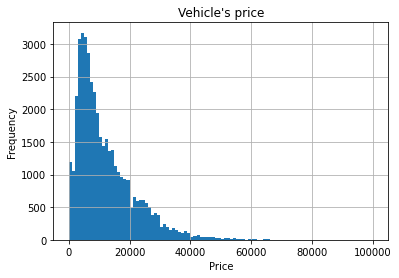

In [26]:
df['price'].hist(bins=100, range=[0, 100000])

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title("Vehicle's price")

La distribución de los datos se concentran hacia la izquierda, entre los valores de 0 a 40000. A continuación se presenta un gráfico de cajas y bigotes para esta misma variable, para conocer su rango intercuartílico, su mediana y su dispersión.

Text(0.5, 1.0, "Vehicle's Price Boxplot")

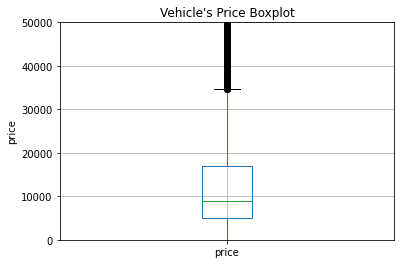

In [27]:
df.boxplot('price')

plt.ylabel('price')
plt.ylim(0,50000)
plt.title("Vehicle's Price Boxplot")

La mayoría de los valores se encunetra entre los 5.000 y los 17.000 dólares aproximadamente, con la mediana bordeando los 9.000 dólares. Los bigotes son asimétricos respecto a la caja y se observa mucha dispersión de datos en los valores de auto más caros. 

### Car Age



Text(0.5, 1.0, "Vehicle's amount of years when it was posted")

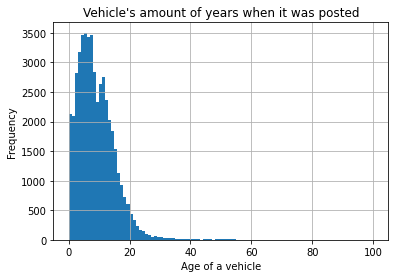

In [35]:
df['car_age'].hist(bins=100, range=[0, 100])

plt.xlabel('Age of a vehicle')
plt.ylabel('Frequency')
plt.title("Vehicle's amount of years when it was posted")

La distribución de la edad de los autos cuando sus anuncios fueron creados también se concentra a la derecha, con una significante caída a partir de los 20 años. 

Text(0.5, 1.0, "Vehicle's Age")

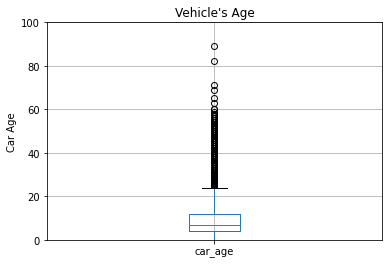

In [36]:
df.boxplot('car_age')

plt.ylabel('Car Age')
plt.ylim(0,100)
plt.title("Vehicle's Age")

La mediana se observa alrededor de los 8 u 9 años, y los bigotes son asimétricos respecto a su caja. Se observa una cantidad significativa de datos por sobre el límite superior, llegando casi a los 90 años.

### Odometer



Text(0.5, 1.0, "Vehicle's mileage")

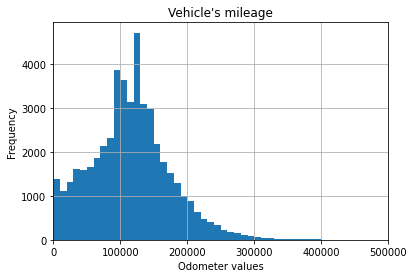

In [37]:
df['odometer'].hist(bins=100, range=[0,1000000])
plt.xlabel('Odometer values')
plt.xlim(0,500000)
plt.ylabel('Frequency')
plt.title("Vehicle's mileage")

Se ve un gran pico para el millaje alrededor de las 110.000 millas. Sin embargo, buscando información adicional, esto parece ser común en vehículos usados en venta de alrededor de 10 años (fuente: https://www.wfla.com/tampa-hoy/noticias-locales/cuantas-millas-ya-son-demasiadas-para-un-automovil-usado/#:~:text=Vale%20la%20pena%20reiterar%20que,150%2C000%20millas%20en%20el%20od%C3%B3metro.)

Text(0.5, 1.0, "Vehicle's Odometer")

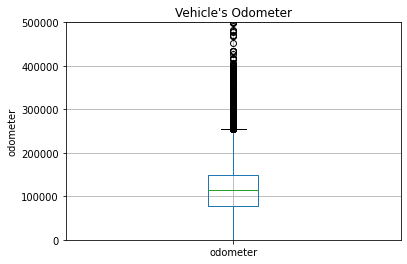

In [38]:
df.boxplot('odometer')

plt.ylabel('odometer')
plt.ylim(0,500000)
plt.title("Vehicle's Odometer")

La mediana se observa alrededor de las 110.000 millas, y los bigotes son asimétricos respecto a su caja. Se observa una cantidad significativa de datos por sobre el límite superior, llegando a medio millón de millas.

### Cylinders



Text(0.5, 1.0, "Vehicle's amount of cylinders")

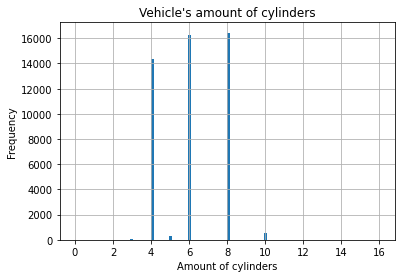

In [39]:
df['cylinders'].hist(bins=100, range=[0, 16])

plt.xlabel('Amount of cylinders')
plt.ylabel('Frequency')
plt.title("Vehicle's amount of cylinders")

La mayoría de los vehículos tienen entre 4 a 8 cilindros. La variable no parece tener datos anómalos.

Text(0.5, 1.0, "Vehicle's Cylinders")

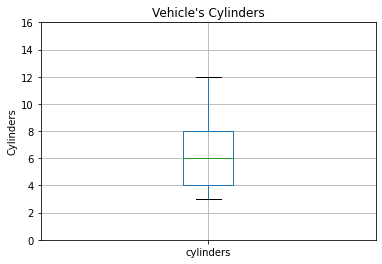

In [40]:
df.boxplot('cylinders')

plt.ylabel('Cylinders')
plt.ylim(0,16)
plt.title("Vehicle's Cylinders")

Se obsrva claramente que la mediana está en 6 cilindros y no se observa dispersión de datos.

### Condition



Text(0.5, 1.0, "Vehicle's Condition")

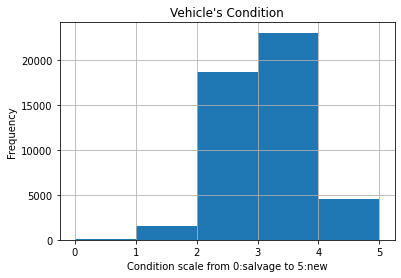

In [41]:
df['condition'].hist(bins=5)

plt.xlabel('Condition scale from 0:salvage to 5:new')
plt.ylabel('Frequency')
plt.title("Vehicle's Condition")

Una minoría de los autos están en condición de ser rescatables, y también, pocos autos son nuevos. Ambos datos parecen razonables para una página de anuncios online.

Text(0.5, 1.0, "Vehicle's Condition")

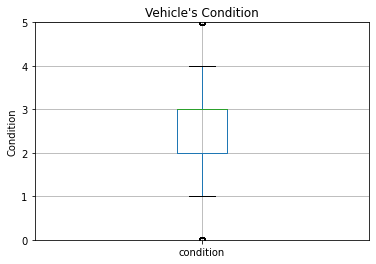

In [42]:
df.boxplot('condition')

plt.ylabel('Condition')
plt.ylim(0,5)
plt.title("Vehicle's Condition")

La mediana está en 3, es decir, excelente. No se observa dispersión de datos.

## Estudio y tratamiento de valores atípicos

A continuación, utilizando el IQR o rango intercuartílico, se determinarán los límites inferiores y superiores para los datos típicos. Dicha información será utilizada para filtra el dataframe, creando uno nuevo sin estos valores atípicos que podrían alterar los resultados del análisis.


In [43]:
iqr = df[['price', 'car_age', 'odometer']].quantile(0.75) - df[['price', 'car_age', 'odometer']].quantile(0.25)
lower_limit = df[['price', 'car_age', 'odometer']].quantile(0.25) - 1.5*iqr
print(lower_limit)

price      -12850.0
car_age        -8.0
odometer   -30045.5
dtype: float64


In [44]:
iqr = df[['price', 'car_age', 'odometer']].quantile(0.75) - df[['price', 'car_age', 'odometer']].quantile(0.25)
upper_limit = df[['price', 'car_age', 'odometer']].quantile(0.75) + 1.5*iqr
print(upper_limit)

price        34750.0
car_age         24.0
odometer    254966.5
dtype: float64


Ahora vamos a ver cuántos valores por encima de cada límite hay para cada parámetro

In [45]:
atypical_values_price = (df['price']>34750).sum()
atypical_values_price

1512

In [46]:
atypical_values_car_age = (df['car_age']>24).sum()
atypical_values_car_age

737

In [47]:
atypical_values_odometer = (df['odometer']>247317.5).sum()
atypical_values_odometer 

1088

Las filas con valores atípicos representan un 7% de los datos por los que usaremos el método .query para trabajar sin los valores atípicos en un nuevo dataframe, al cual llamaremos "data".

In [48]:
data = df.query('(price < 34750) & (car_age < 24) & (odometer < 247317.5)')
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_age,avg_miles_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,7,20714.285714
1,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,6,18333.333333
2,1500,2003,ford f-150,1,8,gas,121928,automatic,pickup,other,0,2019-03-22,9,16,7620.500000
3,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2,40451.500000
4,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,4,14488.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47901,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,5,17627.200000
47902,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,16,11343.750000
47903,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,9,14222.222222
47904,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,5,27914.600000


## Estudio de los parámetros principales sin valores atípicos

Con este nuevo dataframe, volveremos a crear histogramas para los parámetros principales a los cuales se les realizaron ajustes: precio, edad, y odómetro. Para no crear histogramas individuales, esta vez de crearán los tres histogramas a partir de una sola línea de código.

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'car_age'}>],
       [<AxesSubplot:title={'center':'odometer'}>, <AxesSubplot:>]],
      dtype=object)

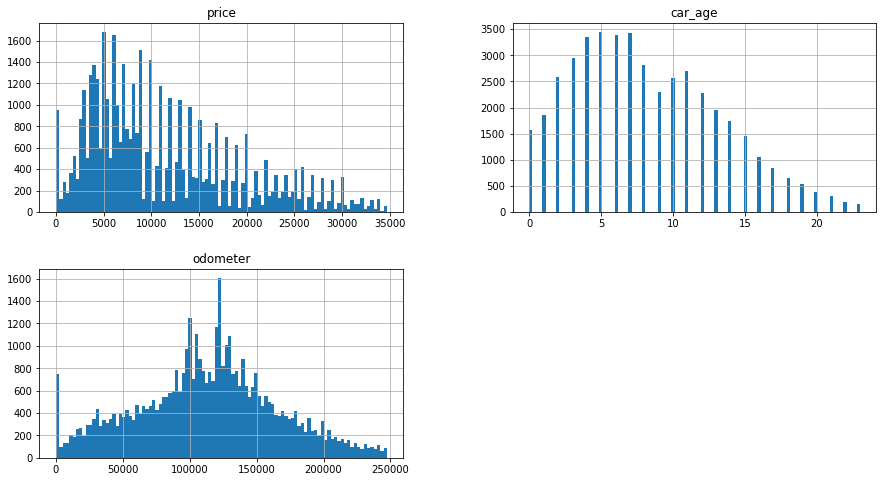

In [49]:
data[['price', 'car_age', 'odometer']].hist(bins=100, figsize=(15,8))

La distribución para todas las variables se ve menos concentrada hacia el extremo izquierdo que antes. Se sigue observando un gran pico en la frecuencia de los vehículos cuyo millaje ronda las 110.000 a 120.000 millas, pero como se observó antes, esto parece ser una característica habitual dentro del rubro de los autos usados.

## Periodo de colocación de los anuncios

A continuación, se estudiará por cuántos días fueron mostrados los anuncios mediante un histograma. Para conocer la duración promedio de un anuncio, se calculará la media y la mediana. También se estudiarán los anuncios de corta y larga duración.

Text(0.5, 1.0, 'Length of an ad in days')

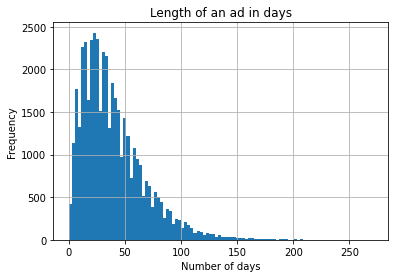

In [50]:
data['days_listed'].hist(bins=100)

plt.xlabel('Number of days')
plt.ylabel('Frequency')
plt.title("Length of an ad in days")

El gráfico muestra que la mayor parte de los anuncios duran menos de 100 días. Llama la atención que existan anuncios con valores de 0 días.

In [51]:
mean = data['days_listed'].mean()
mean

39.557943484027604

In [52]:
median = data['days_listed'].median()
median

33.0

La media y la mediana no son lejanas, y toman los valores de 39,5 y 33 respectivamente, es decir, un poco más de un mes.

A continuación se estudiarán anuncios de corta duración, aquellos que, como se identificó previamente, sus anuncios durán solo un día

In [53]:
data[data['days_listed'] == 0].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_age,avg_miles_year
1165,14995,2008,chevrolet silverado 1500,3,8,gas,93300,automatic,truck,grey,1,2018-05-15,0,10,9330.000000
1854,14000,1999,ford f250,3,8,diesel,137500,automatic,truck,red,1,2018-09-27,0,19,7236.842105
4254,5000,2007,toyota corolla,2,4,gas,223000,manual,sedan,silver,0,2018-07-11,0,11,20272.727273
4570,12500,2001,ram 1500,2,8,gas,99892,automatic,truck,black,1,2018-05-11,0,17,5876.000000
5707,500,2003,dodge dakota,1,6,gas,215457,automatic,pickup,other,0,2018-10-31,0,15,14363.800000
6120,4800,2007,honda odyssey,2,6,gas,152400,automatic,mini-van,brown,0,2018-09-25,0,11,13854.545455
6560,5900,2007,jeep grand cherokee laredo,3,6,gas,137473,automatic,SUV,grey,1,2018-07-21,0,11,12497.545455
8935,4999,2012,nissan sentra,3,4,gas,125000,automatic,sedan,silver,0,2019-03-26,0,7,17857.142857
9055,15000,2003,ford f-150,2,8,gas,90048,automatic,truck,black,0,2018-09-21,0,15,6003.200000
9976,3100,2000,chevrolet silverado,2,8,gas,211000,automatic,truck,white,0,2018-07-06,0,18,11722.222222


In [54]:
data[data['days_listed'] == 0]['days_listed'].value_counts()

0    44
Name: days_listed, dtype: int64

Existen 44 anuncios que duraron un día. Es poco probable que un auto usado se venda tan rápido, ya que se debe contactar con el proveedor antes de comprarlo, y probablemente el usuario busque información adicional antes de hacer una compra de ese tipo. Quizás estos datos corresponden a personas que hicieron un anuncio y luego lo borraron, pero del cual quedó registro en la base de datos.

También se podría considerar un tiempo corto menos de una semana. A continuación se observan esos datos en más profundidad.

In [55]:
data[data['days_listed'] < 7]['days_listed'].value_counts()

6    527
5    429
4    370
3    342
2    217
1    154
0     44
Name: days_listed, dtype: int64

Menos de un 5% de los vehículos se venden dentro de una semana. A continuación se mostrará una muestra de los vehículos cuyos anuncios son de más de 100 días de duración, es decir, un tiempo muy largo.

In [56]:
data[data['days_listed'] > 100].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_age,avg_miles_year
14,17990,2013,ram 1500,3,8,gas,107279,automatic,pickup,red,1,2018-05-15,111,5,21455.800000
26,29800,2012,chevrolet corvette,3,8,gas,57413,automatic,coupe,orange,0,2018-10-22,101,6,9568.833333
32,9500,2008,toyota highlander,2,6,gas,149799,automatic,SUV,other,0,2018-06-04,121,10,14979.900000
49,3800,2012,ford focus,2,4,gas,130323,automatic,sedan,black,0,2018-11-29,261,6,21720.500000
83,18800,2015,chevrolet camaro lt coupe 2d,2,6,gas,33926,other,coupe,grey,0,2019-01-16,152,4,8481.500000
97,22900,2014,ford f150 supercrew cab xlt,2,6,gas,73711,automatic,pickup,white,1,2019-02-27,141,5,14742.200000
129,4500,2013,nissan altima,3,4,gas,140000,automatic,sedan,silver,0,2019-03-29,108,6,23333.333333
135,15995,2013,jeep wrangler,3,6,gas,138806,automatic,SUV,black,1,2018-09-08,112,5,27761.200000
178,6995,2009,ford ranger,2,4,gas,140000,automatic,pickup,white,0,2019-03-31,130,10,14000.000000
211,8795,2014,honda civic,3,4,gas,85452,automatic,sedan,grey,0,2018-09-11,164,4,21363.000000


A simple vista, no parece haber un patrón que explique porque algunos vehículos tardan tanto en venderse, sin embargo, si se observan algunos vehículos con valores bastante más altos que el promedio, lo que puede entorpecer su venta.

In [57]:
data[data['days_listed'] > 100]['days_listed'].value_counts()

101    76
104    73
103    71
102    65
105    60
       ..
189     1
180     1
179     1
168     1
271     1
Name: days_listed, Length: 121, dtype: int64

Lo bueno es que al menos ningun vehículo tiene un tiempo de venta mayor a 271 días, es decir, todos se venden en menos de un año.

## Precio promedio por cada tipo de vehículo

A continuación se analizará mediante una tabla dinámica el número de anuncio y el precio promedio para cada tipo de vehiculo. Esto nos dará una idea de cuáles son los tipos de vehículo con más anuncios en el sitio web.

In [58]:
type_summary = data.pivot_table(index='type', values='price', aggfunc=['count','mean'])
type_summary

,count,mean
,price,price
type,,
SUV,10940,10524.127239
bus,18,19959.166667
convertible,316,12999.996835
coupe,1870,13593.239572
hatchback,931,6866.700322
mini-van,1057,8092.774834
offroad,171,14603.315789
other,210,10399.471429


Los dos tipos de vehículos más caros son los buses y los pickup. Esto tiene sentido al ser dos tipos de vehículo de gran volumen. Por otra parte, los dos tipos de autos con más anuncios son los sedan y los SUV, autos que son comúnmente conducidos por un alto porcentaje de la población.

Text(0, 0.5, 'Number of Ads')

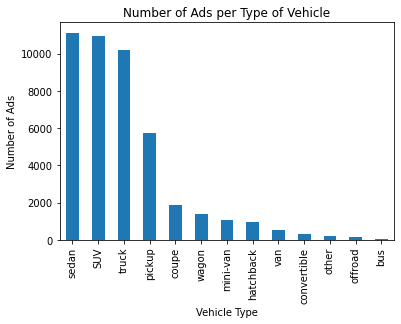

In [59]:
type_ads = data['type'].value_counts()
type_ads.plot(kind='bar')
plt.title('Number of Ads per Type of Vehicle')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Ads')

En el gráfico de barras anterior se observa con mayor claridad que los sedan y los SUV son los autos con una mayor cantidad de anuncios, superando ambos los 10.000 anuncios.

## Factores de precio

A continuación, se trabajará solo con los vehículos más populares en el sitio web: sedan, SUV, truck, pickup y coupe. Para ellos se estudiará como el precio se relaciona con la edad, el millaje, la condición, el tipo de transmisión y el color. Se trabajarán de forma separada las variables categóricas y númericas. 

In [60]:
most_popular = data[data.type.isin(['sedan', 'SUV', 'truck', 'pickup', 'coupe'])]
most_popular.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_age,avg_miles_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,7,20714.285714
1,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,6,18333.333333
2,1500,2003,ford f-150,1,8,gas,121928,automatic,pickup,other,0,2019-03-22,9,16,7620.500000
3,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2,40451.500000
4,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,4,14488.500000


### Variables categóricas

Para trabajar con estas variables, observaremos primero si cada categoría tiene al menos 50 anuncios usando el método value_counts. Trabajar con una menor cantidad de anuncios no permitiría sacar conclusiones confiables debido al pequeño tamaño muestral.

##### Tipo de transmisión

In [61]:
ads_amount_transmission = most_popular.transmission.value_counts()
ads_amount_transmission

automatic    36410
manual        1876
other         1570
Name: transmission, dtype: int64

Text(0.5, 1.0, "Price according to a vehicle's transmission")

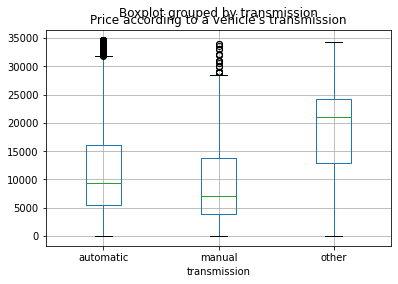

In [62]:
most_popular.boxplot(by='transmission', column='price')
plt.title("Price according to a vehicle's transmission")

Se observa de acuerdo al gráfico que aquellos vehículos que tienen otro tipo de transmisión, que no sea automático o manual tienen un precio promedio más alto según el gráfico. Sin embargo, tales vehículos solo representan un 3,9% de los vehículos, por lo que sería apresurado sacar conclusiones al respecto

##### Color

In [63]:
ads_amount_color = most_popular.paint_color.value_counts()
ads_amount_color

white     7789
other     7165
black     6064
silver    4960
grey      3965
red       3393
blue      3370
green      958
brown      904
custom     861
yellow     186
orange     164
purple      77
Name: paint_color, dtype: int64

Text(0.5, 1.0, "Price according to a vehicle's color")

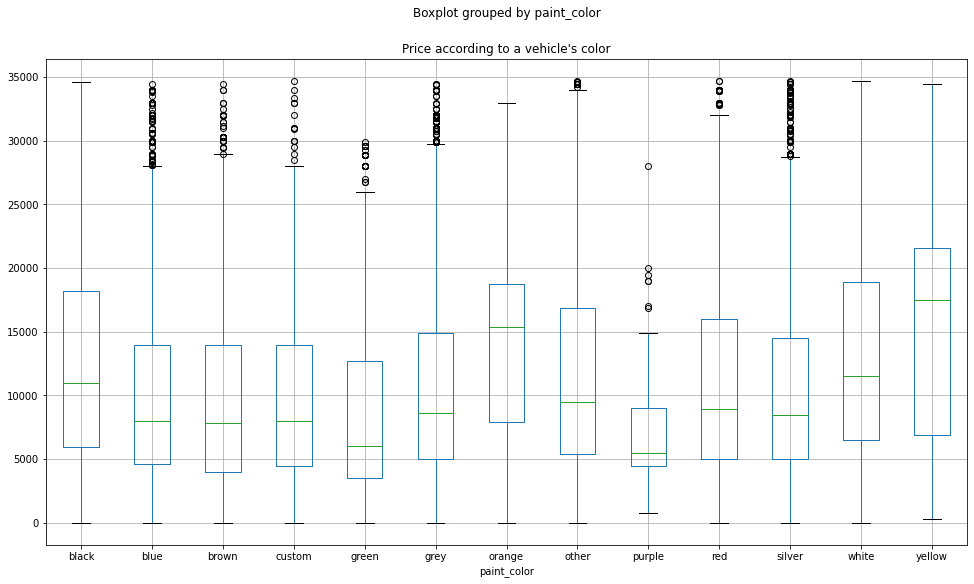

In [64]:
most_popular.boxplot(by='paint_color', column='price', figsize=(16,9))
plt.title("Price according to a vehicle's color")

Según el gráfico, los autos amarillos y naranjos tienen una valor de venta más alto. Sin embargo, no hay muchos anuncios de ellos como para sacar conclusiones significativas al respecto.

### Variables númericas

##### Precio

Text(0.5, 1.0, "Price according to a vehicle's age")

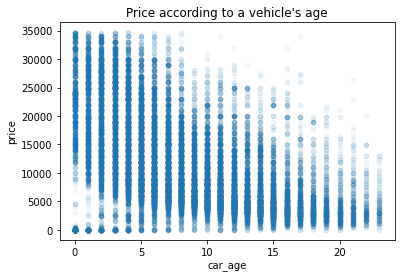

In [65]:
most_popular.plot.scatter(x='car_age', y='price', alpha=0.05)
plt.title("Price according to a vehicle's age")

Se observa a grandes rasgos una mancha en diagonal que desciende de izquierda a derecha, lo que muestra una correlación negativa del precio con la edad del vehículos. Por lo tanto, Los autos más viejos tienden a ser más baratos, lo que es razonable.

Text(0.5, 1.0, "Price according to a vehicle's mileage")

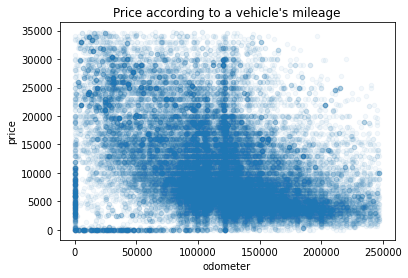

In [66]:
most_popular.plot.scatter(x='odometer', y='price', alpha=0.05)
plt.title("Price according to a vehicle's mileage")

Nuevamente se observa un correlación negativa del precio con el millaje. Mientras el millaje es más bajo, el precio es más alto. Esto es razonable ya que un millaje más bajo da la impresión de un vehículo que ha tenido menos uso.

Text(0.5, 1.0, "Price according to a vehicle's condition")

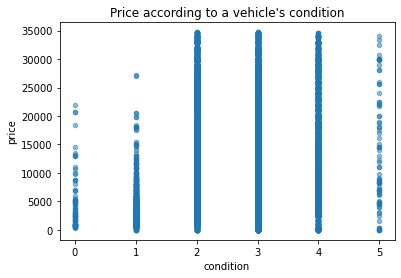

In [67]:
most_popular.plot.scatter(x='condition', y='price', alpha=0.5)
plt.title("Price according to a vehicle's condition")

La distribución de los datos se concentra en aquellos que están bien (2), excelentes (3), y como nuevos (4). Se observa que la condición efectivamente impacta que un auto tenga un mayor precio.

Finalmente, se trazará una matriz de correlación para observar los coeficientes de correlación de Pearson de las variables, que dará una medida númerica de la fuerza de la corelación entre las variables. 

In [68]:
most_popular.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,car_age,avg_miles_year
price,1.000000,0.536078,0.168355,0.311109,-0.394320,0.342922,-0.004034,-0.534143,0.290371
model_year,0.536078,1.000000,0.275922,-0.151925,-0.553767,-0.013824,-0.005487,-0.995970,0.543572
condition,0.168355,0.275922,1.000000,-0.086286,-0.227864,-0.002982,-0.001626,-0.274740,0.116749
cylinders,0.311109,-0.151925,-0.086286,1.000000,0.131722,0.449356,0.001348,0.151552,-0.042287
odometer,-0.394320,-0.553767,-0.227864,0.131722,1.000000,0.076914,0.008084,0.551664,0.065930
is_4wd,0.342922,-0.013824,-0.002982,0.449356,0.076914,1.000000,0.001436,0.013723,0.042112
days_listed,-0.004034,-0.005487,-0.001626,0.001348,0.008084,0.001436,1.000000,0.006468,-0.005546
car_age,-0.534143,-0.995970,-0.274740,0.151552,0.551664,0.013723,0.006468,1.000000,-0.553189
avg_miles_year,0.290371,0.543572,0.116749,-0.042287,0.065930,0.042112,-0.005546,-0.553189,1.000000


La matriz muestra una fuerte correlación para el año del modelo y la edad del auto en relación al precio, siendo la primera una corelación positiva y la segunda una correlación negativa.

## Conclusión general


Para realizar este informe se analizaron las características de distintos tipos de vehículos publicados de forma gratuita en el sitio wbe Crankshaft List. El objetivo final era conocer qué factores incluyen en el precio de un vehículo.

El primer paso para el análisis fue la carga de datos y librerías y la exploración inicial. Dicha exploración dio cuenta de la existencia de datos ausentes para algunas columnas y la necesidad de corregir el tipo de datos para otras. 

Los datos ausentes fueron tratados de la siguiente manera:
a) is_4wd fue reconocida como una variable dummy, a la que le faltaba el 0 para denotar ausencia de valor, lo cual fue remediado usando .fillna.
b) odometer fue reemplazado con la mediana de los datos para dicha variable.
c) cylinders también fue reemplazado con la mediana de los datos para dicha variable.
d) paint_color fue reemplazado por una nueva opción para tal variable, llamada otro.
f) model_year era la columna cuyo porcentaje de datos ausentes era el más bajo, y fueron removidos al no llegar a representar un 10% de los datos.

No se encontraron filas duplicadas, pero el análisis mediante gráficos de histograma y cajas y bigotes dieron cuenta de la existencia de valore atípicos para tres columnas: la edad del auto, el odómetro y el precio. Para eliminar dichas anomalías se trabajo con el rango intercuartílico para conocer a partir de que punto se deberían excluir ciertos datos del análisis. De esta manera, se hizo un data slice usando el método .query.

Luego de todos estos ajustes se realizó un análisis exploratorio de datos, enfocandonos en los vehículos más populares, entendiendo la popularidad cómo el tener una mayor cantidad de anuncios dentro del sitio web.De dicho análisis se pudo concluir que:
a) La edad del vehículo correlaciona negativamente con su precio.
b) El millaje del vehiculo correlaciona negativamente con su precio.
c) La condicion del vehículo correlaciona positivamente con su precio, entendiendo que a mejor condición mayor precio.

Finalmente, se trazó una matriz de correlación que mostró una correlación positiva entre el año del modelo y el precio, es decir, que modelos más recientes tienden a ser más caros. Esto tiene mucho sentido y se relaciona con una variable que ya fue estudiada, la edad del vehículo. Por lo tanto, se puede afirmar que uno de los factores que más impacta el precio de un vehículo es su cantidad de años.
